In [3]:
import os
import json
import sys
from pathlib import Path

def remove_prefix_suffix(path, prefix=None, suffix=None):
    # Remove prefix if it matches
    if prefix and path.startswith(prefix):
        path = path[len(prefix):]
    
    # Remove suffix if it matches
    if suffix and path.endswith(suffix):
        path = path[:-len(suffix)]
    
    return path

def extract_values_from_json(file_path):
    try:
        # Read and parse the JSON file
        with open(file_path, 'r') as file:
            data = json.load(file)
        
        # Extract the "ptm" value
        ptm = data.get('ptm')

        # Extract the "confidence" value
        confidence = data.get('confidence_score')

        # Extract the second line after both "pair-chains-iptm" and ""0": {", which starts with "1"
        second_line_1 = data['pair_chains_iptm']['0']['0'] if 'pair_chains_iptm' in data and '0' in data['pair_chains_iptm'] else None

        # Extract the first line after both "pair-chains-iptm" and ""1": {", which starts with "0"
        first_line_0 = data['pair_chains_iptm']['1']['1'] if 'pair_chains_iptm' in data and '1' in data['pair_chains_iptm'] else None
        
        greater = max(second_line_1, first_line_0)
        
        # Output the results
        return(f'ipTM protein(1,2): {second_line_1}, ipTM protein(2,1): {first_line_0}, \
        ptm: {ptm}, confidence: {confidence}, highest ipTM: {greater}')

    except Exception as e:
        return f"Error processing file {file_path}: {str(e)}"

import os

def find_directories_with_file(root_dir, filename):
    """Find all subdirectories that contain a file named 'filename'."""
    result = []
    for root, dirs, files in os.walk(root_dir):
        if filename in files:
            result.append(root)
    return result

def process_directory(directory):
    """Process the directory and return some output."""
    # Replace this with your actual processing logic
    output = f"Processing directory: {directory}\n"
    # You can perform more complex processing here as needed
    return output

def export_output_to_file(output, root_dir, output_filename="Combined_PTM_output.txt"):
    """Export the output to a single file in the root directory."""
    output_path = os.path.join(root_dir, output_filename)
    with open(output_path, 'a') as f:  # 'a' for appending to the file
        f.write(output)
        f.write('\n')

def main(root_dir):
    # 1. Find directories containing 'confidences_0.json'
    directories = find_directories_with_file(root_dir, 'confidence_job_model_0.json')
    
    # 2. Call the method and export the output to the same file in the root directory
    for directory in directories:
        print(f"Processing directory: {directory}")
        #print(directory + "/confidence_job_model_0.json")
        output =  extract_values_from_json(directory + "/confidence_job_model_0.json")
        new_path = remove_prefix_suffix(directory, prefix=root_dir)
        truncated_path = remove_prefix_suffix(new_path, suffix="/predictions/job")
        export_output_to_file(truncated_path, root_dir)
        export_output_to_file(output, root_dir)
        export_output_to_file("", root_dir)
        #print(truncated_path)
        # Append output to file in root directory
        #print(f"Output for {directory} appended to: {root_dir}/output.txt")

if __name__ == "__main__":
    root_dir = '/Users/ntw/Desktop/OA_Related_Genes_Tirzepatide_2/'  
    if os.path.exists(root_dir+"/Combined_PTM_output.txt"):
        os.remove(root_dir+"/Combined_PTM_output.txt")
    main(root_dir)



Processing directory: /Users/ntw/Desktop/OA_Related_Genes_Tirzepatide_2/P35318_Tirzepatide/Past_Runs/MSA_subsampling_1/predictions/job
Processing directory: /Users/ntw/Desktop/OA_Related_Genes_Tirzepatide_2/P35318_Tirzepatide/Past_Runs/MSA_subsampling_2/predictions/job
Processing directory: /Users/ntw/Desktop/OA_Related_Genes_Tirzepatide_2/P35318_Tirzepatide/Past_Runs/MSA_subsampling_5/predictions/job
Processing directory: /Users/ntw/Desktop/OA_Related_Genes_Tirzepatide_2/P35318_Tirzepatide/Past_Runs/MSA_subsampling_4/predictions/job
Processing directory: /Users/ntw/Desktop/OA_Related_Genes_Tirzepatide_2/P35318_Tirzepatide/Past_Runs/MSA_subsampling_3/predictions/job
Processing directory: /Users/ntw/Desktop/OA_Related_Genes_Tirzepatide_2/P35318_Tirzepatide/Past_Runs/Original_MSA/predictions/job
Processing directory: /Users/ntw/Desktop/OA_Related_Genes_Tirzepatide_2/Q96EZ4_Tirzepatide/Past_Runs/MSA_subsampling_1/predictions/job
Processing directory: /Users/ntw/Desktop/OA_Related_Genes_Ti

Label - pTM values:
A0PJW8: 0.2911389172077179
A4D0V7: 0.5167258977890015
A6NC86: 0.8294816017150879
A6PVS8: 0.403717964887619
A7MD48: 0.12723299860954285
A9YTQ3: 0.3350372016429901
B1AH88: 0.4147565960884094
C9JL84: 0.24015195667743683
F7VJQ1: 0.34386658668518066
H3BQB6: 0.15939733386039734
O00444: 0.37252020835876465
O00743: 0.9739024639129639
O14513: 0.20292596518993378
O14543: 0.6543792486190796
O14792: 0.8600921034812927
O15409: 0.1983281522989273
O43150: 0.35536324977874756
O43570: 0.7662513256072998
O60299: 0.17596431076526642
O60512: 0.8363401889801025
O60895: 0.5373054146766663
O60936: 0.40705418586730957
O75051: 0.4533296823501587
O75129: 0.44952720403671265
O75157: 0.15055644512176514
O75164: 0.45740944147109985
O75167: 0.16690047085285187
O75362: 0.1760631501674652
O75366: 0.7386412024497986
O75530: 0.8084535598754883
O75879: 0.7942737936973572
O75899: 0.5929259657859802
O75914: 0.5823065042495728
O75973: 0.5588345527648926
O76038: 0.5858430862426758
O76041: 0.1693816334009

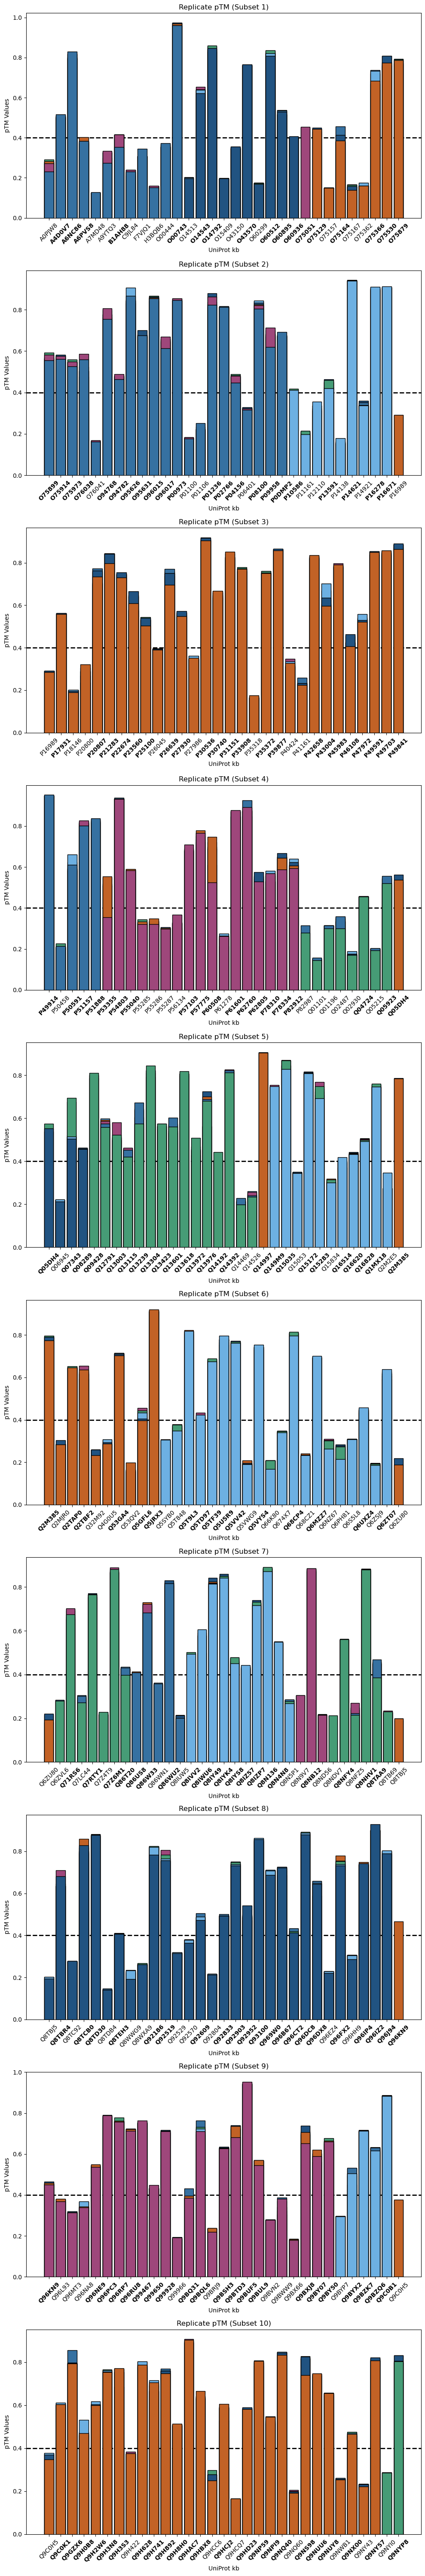

In [15]:
##Adapted from ChatGPT

import matplotlib.pyplot as plt
import re
import numpy as np

# Function to process each paragraph
def process_paragraph(paragraph):
    # Extract filename (Assume it's always before the first underscore)
    filename = paragraph.split('_')[0]
    
    # Extract highest ipTM value using regex
    match = re.search(r'ipTM protein\(2,1\):\s([0-9.]+)', paragraph)
    if match:
        highest_ipTM = float(match.group(1))
        return filename, highest_ipTM
    else:
        raise ValueError("highest ipTM not found in paragraph.")

# Lists to store filenames and their corresponding highest ipTM values
filenames = []
highest_ipTM_values = []

# Read the input file
with open('/Users/ntw/Desktop/OA_Related_Genes_Tirzepatide_2/Combined_PTM_Output.txt', 'r') as f:
    # Read the whole file and split into paragraphs based on blank lines
    file_content = f.read()
    paragraphs = file_content.strip().split('\n\n')  # Split by double newlines

# Iterate over each paragraph, process it, and collect data
for paragraph in paragraphs:
    try:
        filename, highest_ipTM = process_paragraph(paragraph)
        filenames.append(filename)
        highest_ipTM_values.append(highest_ipTM)
    except ValueError as e:
        print(f"Error processing paragraph: {e}")

# Sort the filenames and highest ipTM values by filename (alphabetically)
sorted_filenames, sorted_ipTM_values = zip(*sorted(zip(filenames, highest_ipTM_values), key=lambda x: x[0]))
#print(sorted_filenames)
#print(sorted_ipTM_values)
# Input the number of subplots (n)
n = 10  # Change this value to the desired number of subplots

# Divide data into n subsets (each containing roughly 1/nth of the filenames)
num_files = len(sorted_filenames)
subset_size = num_files // n

# Define a colorblind-friendly palette
colorblind_palette = ['#469C76', '#6DB0E2', '#215381', '#C26226', '#9E477B', '#3671A1']
# '#275D47', '#3671A1', '#11314E', '#753B13'

# Dictionary to track the maximum ipTM value for each filename
filename_max_ipTM = {}

# Track the maximum ipTM value for each filename across the entire dataset
for filename, ipTM in zip(sorted_filenames, sorted_ipTM_values):
    if filename not in filename_max_ipTM:
        filename_max_ipTM[filename] = ipTM
    else:
        filename_max_ipTM[filename] = max(filename_max_ipTM[filename], ipTM)

# Print the highest ipTM values for each label
print("Label - pTM values:")
for filename, max_ipTM in filename_max_ipTM.items():
    print(f"{filename}: {max_ipTM}")

red_labels=[]
# Set to track filenames that should have a red label (i.e., those with max ipTM > 0.4)
for filename, max_ipTM in filename_max_ipTM.items():
    if max_ipTM > 0.4:
        print ("filename", filename, "has pTM", max_ipTM)
        red_labels.append(filename)
    else:
        pass
#print(red_labels)
# Create the figure and axes for the subplots
fig, axes = plt.subplots(n, 1, figsize=(10, 6 * n), sharex=False, sharey=False)

# Plot the data in n separate subplots
for i in range(n):
    # Get the filenames and highest ipTM values for the current subset
    start_idx = i * subset_size
    end_idx = (i + 1) * subset_size if i < n - 1 else num_files  # Last subset may have more files if the total isn't divisible by n
    subset_filenames = sorted_filenames[start_idx:end_idx]
    subset_ipTM_values = sorted_ipTM_values[start_idx:end_idx]

    # Add a dashed line at ipTM = 0.4
    axes[i].axhline(y=0.4, color='black', linestyle='--', linewidth=2, zorder=1)
    
    # Plot the data for this subset in the current subplot
    # Use a different color for each bar in the subset
    bar_colors = [colorblind_palette[j % len(colorblind_palette)] for j in range(len(subset_filenames))]
    bars = axes[i].bar(subset_filenames, subset_ipTM_values, color=bar_colors, edgecolor='black')

    # Set the title for each subplot
    axes[i].set_title(f"Replicate pTM (Subset {i+1})", fontsize=12)
    axes[i].set_xlabel('UniProt kb', fontsize=10)
    axes[i].set_ylabel('pTM Values', fontsize=10)
    
   
    # Modify the x-axis labels to be red if their corresponding filename is in the red_labels set
    labels = axes[i].get_xticklabels() # Get current x-axis labels
    #print(labels)
    for label in labels:
        labelName=label.get_text()
        #print(labelName)
        # Check if the filename corresponding to this label should be red
        if labelName in red_labels:
            label.set_fontweight('bold')  # Set the label to red if the filename is in the red_labels set
        else:
            pass
    # Rotate the x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing between subplots
plt.tight_layout()
plt.show()
